In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as ply
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected = True)

In [3]:
data = pd.read_csv('013 IndexE8.csv')

In [4]:
data.date = pd.to_datetime(data.date, dayfirst=False)

In [5]:
data.head()

date     spx      dax     ftse    nikkei
0 1994-07-01  469.90  2224.95  3445.98  18124.01
1 1994-10-01  475.27  2225.00  3440.58  18443.44
2 1994-11-01  474.13  2228.10  3413.77  18485.25
3 1994-12-01  474.17  2182.06  3372.02  18793.88
4 1994-01-13  472.47  2142.37  3360.01  18577.26

In [6]:
df_ftse = data[['date', 'ftse']]

In [7]:
df_ftse.head()

date     ftse
0 1994-07-01  3445.98
1 1994-10-01  3440.58
2 1994-11-01  3413.77
3 1994-12-01  3372.02
4 1994-01-13  3360.01

<AxesSubplot:>

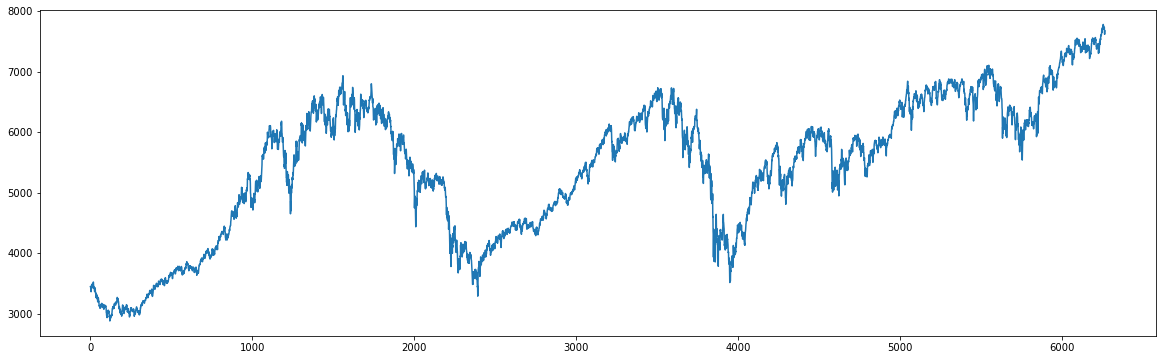

In [8]:
df_ftse.ftse.plot(figsize=(20,6))

In [9]:
from fbprophet import Prophet

In [10]:
df_ftse = df_ftse.rename(columns={'date':'ds','ftse':'y'})

In [11]:
model = Prophet(daily_seasonality=True)
model.fit(df_ftse)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [12]:
future = model.make_future_dataframe(periods=365)
future.head()

ds
0 1994-01-02
1 1994-01-03
2 1994-01-04
3 1994-01-06
4 1994-01-07

In [13]:
future.tail()

ds
6629 2019-11-27
6630 2019-11-28
6631 2019-11-29
6632 2019-11-30
6633 2019-12-01

In [14]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_upper', 'yhat_lower']].tail()

ds         yhat   yhat_upper   yhat_lower
6629 2019-11-27  7495.334871  8072.969232  6988.072489
6630 2019-11-28  7490.220044  8017.225613  6940.501552
6631 2019-11-29  7491.789306  8035.945139  6964.970286
6632 2019-11-30  7510.476517  8061.162713  7011.129553
6633 2019-12-01  7501.963344  8063.698576  6981.729435

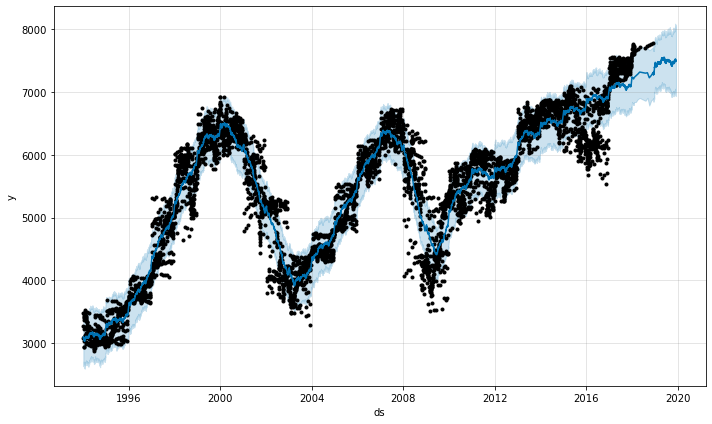

In [15]:
fig1 = model.plot(forecast)

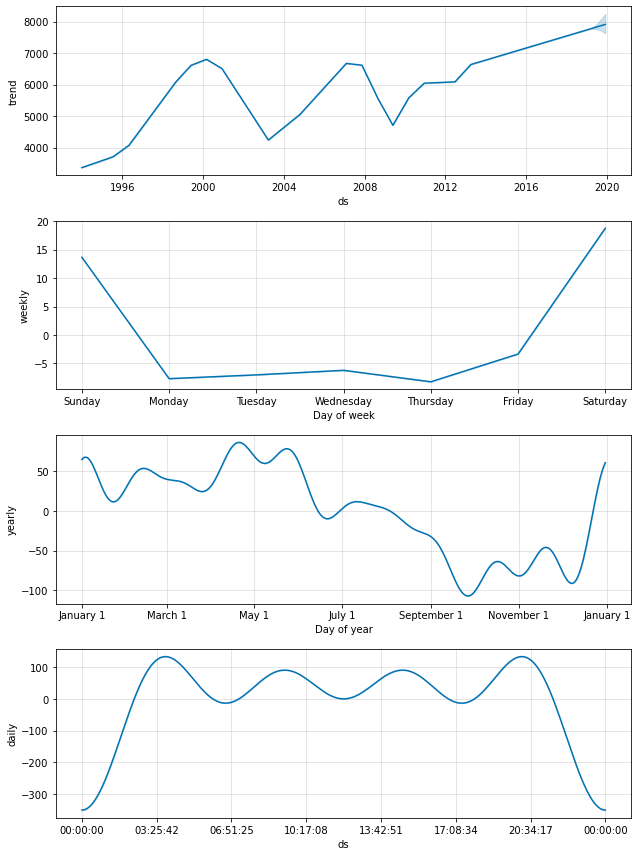

In [16]:
fig2 = model.plot_components(forecast)

In [17]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [18]:
#Python
plot_components_plotly(model, forecast)